In [82]:
import pandas as pd
import numpy as np   
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
%matplotlib inline
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 

In [83]:
import sys
sys.path += ['80-629/week3-Supervised/']

In [84]:
from utils import generate_data, plot_predictions, plot_svc_decision_function

# Question 2 - Classification

## Question 2.1

In [85]:
data = np.load("a22_devoir_q2-classification.npz") 
X = data["X"]
y = data["y"]

In [86]:
print(y)

[0 2 0 2 2 0 0 2 1 0 2 1 1 2 2 0 2 1 2 1 1 0 1 1 1 0 1 0 1 1 0 0 1 2 2 2 2
 0 2 2 0 2 2 2 1 0 1 0 1 2 0 1 0 0 0 2 1 2 2 2 1 1 1 1 0 0 0 2 1 0 0 1 0 2
 0 0 0 1 0 1 1 2 2 0 2 2 0 2 0 2 0 1 1 2 0 1 2 1 1 1]


In [87]:
print(X)
print(X[0])

[[ 0.15494743  0.37816252]
 [ 4.6781908   3.88829842]
 [ 0.06651722  0.3024719 ]
 [ 4.44780833  5.02608254]
 [ 4.77223375  5.00873958]
 [ 1.53277921  1.46935877]
 [ 0.17742614 -0.40178094]
 [ 4.68207696  5.33821665]
 [ 3.26816936  1.23011275]
 [-1.70627019  1.9507754 ]
 [ 5.5940149   5.15847131]
 [ 0.13905245  1.57791809]
 [ 2.50844214  2.11119275]
 [ 4.95077374  4.66826086]
 [ 6.08161797  5.66826397]
 [ 0.14404357  1.45427351]
 [ 4.9658792   5.85667136]
 [ 2.42111906  2.88331001]
 [ 5.28829541  4.89585062]
 [ 0.45814821  1.27554819]
 [ 0.34512589  2.30887379]
 [-0.51080514 -1.18063218]
 [ 1.81241247  2.96495855]
 [ 2.10351246  0.47278486]
 [ 2.0345496   2.55985975]
 [ 0.8644362  -0.74216502]
 [ 0.89523458  3.33366761]
 [ 1.86755799 -0.97727788]
 [-0.24772476  2.85123973]
 [ 4.32472605 -0.52163859]
 [ 1.23029068  1.20237985]
 [ 2.26975462 -1.45436567]
 [-0.25968511  4.41543178]
 [ 5.31261573  4.19897117]
 [ 5.38589528  5.41175208]
 [ 4.49989233  4.22761445]
 [ 4.35357155  5.13352543]
 

In [88]:
X.shape

(100, 2)

In [89]:
X.mean()

2.2693209543318646

In [90]:
x1, x2 = zip(*X)


(array([ 4.,  8., 17.,  7., 11.,  6.,  8.,  9., 18., 12.]),
 array([-1.98079647, -1.18624022, -0.39168397,  0.40287228,  1.19742853,
         1.99198478,  2.78654103,  3.58109728,  4.37565353,  5.17020978,
         5.96476603]),
 <BarContainer object of 10 artists>)

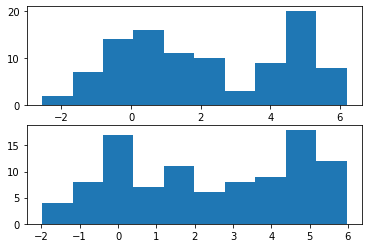

In [91]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.hist(x1)
ax2.hist(x2)

(array([[ 2.,  7., 14., 16., 11., 10.,  3.,  9., 20.,  8.],
        [ 2.,  6., 13., 15., 10.,  6.,  9., 11., 17., 11.]]),
 array([-2.55298982, -1.6785336 , -0.80407738,  0.07037885,  0.94483507,
         1.81929129,  2.69374751,  3.56820373,  4.44265995,  5.31711617,
         6.19157239]),
 <a list of 2 BarContainer objects>)

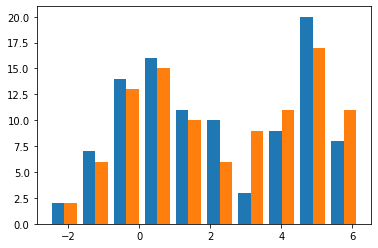

In [92]:
plt.hist(X)

c:\Users\love-\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


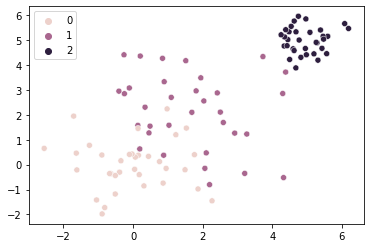

In [93]:
sns.scatterplot(x1, x2, hue = y)
plt.show()

In [94]:
#(4pt) Suite `a une exploration des donn´ees, que remarquez-vous? 
## Il y a deux grands groupes que l'on peut appercevoir. 
# Que pouvez-vous dire de la performance (taux de bonne classification) de test 
# d’un mod`ele n’utilisant que des fronti`eres de d´ecision lin´eaire pour ce probl`eme?

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [96]:
def OLS(X, y):
    # Note: on transforme simplement les cibles de {0,1} à {-1,+1}
    Y = (X_train[1]*2)-1
    Y = Y.reshape(2,1)

    # On calcule les paramètres du modèle
    # (c'est le même calcul que celui de la semaine dernière pour w_ols)
    A = np.linalg.inv(np.dot(X.T, X))
    B = np.dot(X.T, Y)
    
    return np.dot(A, B)

# pour obtenir la frontière de décision visuellement
def calculate_decision_boundary(W):
    x_1 = np.linspace(-10,10) # <- pour x1;
    
    # Le but est donc de calculer x2 à partir de x1 et des poids.
    x_2 = (-W[0] - W[1]*x_1) / W[2]
    return x_1, x_2

In [97]:
X = X_train

# On ajoute une colonne de 1 aux données
# Ça nous permet d'apprendre le biais (w0 dans: w_1x + w0)
X_b = np.array([np.ones(len(X)), X[:,0], X[:,1]]).T
####

Y = y_train 
X_test = X_test

# Comme plus haut on ajoute une colonne de 1 aux données de test
X_test_b = np.array([np.ones(len(X_test)), X_test[:,0], X_test[:,1]]).T
###

Y_test = y_test

# 1) On (estime) entraîne les paramètres
# k est le nombre de classes et dim est la dimensionalité des données 
W = OLS(X_b, Y) # dim x k

# 2) Une fois les paramètres obtenus, on peut obtenir les prédictions 
# a) for test data
y_x = np.dot(W.T, X_test_b.T) # valeur réelle
pred_test = 1*(y_x>0)[0] # valeur binaire

# b) Idem pour l'ensemble d'entraînement
y_x = np.dot(W.T, X_b.T)
pred_train = 1*(y_x>0)[0]


# 3) On calcule aussi la frontière de décision 
#    pour pouvoir la visualiser
line_x, line_y = calculate_decision_boundary(W)


# 4) Rendu visuel
plot_predictions(X,Y, X_test, Y_test, pred_train, pred_test, line_x, line_y)

ValueError: shapes (3,67) and (2,1) not aligned: 67 (dim 1) != 2 (dim 0)

## Question 2.2

In [ ]:
#(6pt) Divide your dataset into training, validation, and test sets. 
#The validation and test sets must each make up 20% of the total original dataset (so 40% in total). 
# Make sure to use this parameter upon calling the appropriate sklearn function: random state=1234. 
# Train a linear SVM on the training set for each one of these C hyperparameter values: {0.001,0.01,0.1,1,10}. 
# For each value of C, what is the performance (accuracy) of the model on the training and validation sets?
#  Given your answer, obtain the performance of the best model on the test set.
#  We ask that you provide the few lines of code you used to divide the data, train the model, and obtain the accuracy.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1234) # 0.25 x 0.8 = 0.2

In [ ]:
cs = [0.001, 0.01, 0.1, 1, 10]
for i, c in enumerate(cs):
    model= SVC(kernel='linear', C=c)
    model.fit(X_train, y_train)

    acc_train = (sum(model.predict(X_train)==y_train)/len(y_train))*100
    acc_validation =  (sum(model.predict(X_val)==y_val)/len(y_val)) *100 

    print("With a value of C: ", c, ", the accuracy of the train model is", acc_train, "% anf<d the accuracy of the  validation model is", acc_validation, "%")

    


With a value of C:  0.001 , the accuracy of the train model is 41.66666666666667 % ans the accuracy of the  validation model is 30.0 %
With a value of C:  0.01 , the accuracy of the train model is 83.33333333333334 % ans the accuracy of the  validation model is 90.0 %
With a value of C:  0.1 , the accuracy of the train model is 86.66666666666667 % ans the accuracy of the  validation model is 90.0 %
With a value of C:  1 , the accuracy of the train model is 90.0 % ans the accuracy of the  validation model is 90.0 %
With a value of C:  10 , the accuracy of the train model is 90.0 % ans the accuracy of the  validation model is 95.0 %


In [ ]:
model = SVC(kernel = 'linear', C = 10)
model.fit(X_train, y_train)

acc_test =  (sum(model.predict(X_test)==y_test)/len(y_test)) *100

print("With a value of C: ", c, ", the accuracy of the test model is", acc_test, "%")

With a value of C:  10 , the accuracy of the test model is 85.0 %


## Question 2.3

In [ ]:
#(4pt) Retrain the SVM model using 10-fold cross-validation for each of the C hyperparameter values from above. 
# For each value of C, provide the training and validation accuracies as well as the performance on the test set of the best model.
#  Careful that you must use the same test set in both cases (previous question and this question)!
#  We ask that you provide the few lines of codes you used to divide the data, train the model, and obtain all accuracies.

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
#We keep validation and train together unlike the question above
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [ ]:
for c in cs:
    model = SVC(kernel='linear', C=c, random_state=1234)
    test = model.fit(X_train, y_train)

    scores = cross_validate(test, X_train,  y_train, cv=10,  return_train_score=True)

    #acc_train = (sum(model.predict(X_train)==y_train)/len(y_train))*100
    #acc_validation =  (sum(model.predict(X_val)==y_val)/len(y_val)) *100 

    print("With a value of C: ", c, ", the mean accuracy of the train model is", scores['train_score'].mean(), '% and the mean accuracy of the validation model is', scores['test_score'].mean(), '%')

With a value of C:  0.001 , the mean accuracy of the train model is 0.3875 % and the mean accuracy of the validation model is 0.3875 %
With a value of C:  0.01 , the mean accuracy of the train model is 0.861111111111111 % and the mean accuracy of the validation model is 0.85 %
With a value of C:  0.1 , the mean accuracy of the train model is 0.8777777777777779 % and the mean accuracy of the validation model is 0.8625 %
With a value of C:  1 , the mean accuracy of the train model is 0.9027777777777777 % and the mean accuracy of the validation model is 0.8625 %
With a value of C:  10 , the mean accuracy of the train model is 0.9152777777777776 % and the mean accuracy of the validation model is 0.875 %


In [ ]:
model = SVC(kernel = 'linear', C = 10)

acc_test =  (sum(test.predict(X_test)==y_test)/len(y_test)) *100

print("With a value of C: ", c, ", the accuracy of the test model is", acc_test, "%")

With a value of C:  10 , the accuracy of the test model is 95.0 %


## Question 2.4 - (2pt) Explain precisely how is the validation performance evaluated when doing cross validation.


## Question 2.5 - (2pt) Do you obtain a better model with cross validation or without it? Justify your answer and explain your result.

# 

# Question 3

## Question 3.1

In [100]:
q3 = pd.read_csv("C:/Users/love-/Documents/HEC/AUT 2022/ML/reviews.tsv", sep ='\t', header = None, names=['Rating', 'Review'])
q3

,Rating,Review
0,5,I like the item pricing. My granddaughter want...
1,4,Love the magnet easel... great for moving to d...
2,5,Both sides are magnetic. A real plus when you...
3,5,Bought one a few years ago for my daughter and...
4,4,I have a stainless steel refrigerator therefor...
...,...,...
9995,1,There are multiple shapes part like oval and t...
9996,5,My 2 1/2 year old loves playing with these puz...
9997,5,I only wish I bought this toy sooner! It was ...
9998,5,My not quite 2 year old grandson took to this ...


In [103]:
X = q3['Rating']
y = q3['Review']

## Question 3.2

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1234) # 0.25 x 0.8 = 0.2